In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

Not Currently in Use


In [7]:
path = 'C:/Users/Bhoomeendra/SMAI/faces'
imgsize = 64*64
nameImg = {}
for img in os.listdir(path):
    finalPath = os.path.join(path,img)
    cimg = cv2.imread(finalPath,-1)
    name = img[:-9]
    
    if(nameImg.get(name) == None):
        nameImg[name] = [cimg/255]
    else:
        nameImg[name].append(cimg/255)
print(len(nameImg))

5749


In [78]:
count = np.zeros((1000))
for key, value in nameImg.items():
    count[len(value)]=1+ count[len(value)]


In [79]:
# No of people with more than 6 or more photos 
print(np.sum(count[20:]))

62.0


In [80]:

testImgNo = 19
# Nomalized but not mean centred
trainImg = {}
testImg  = {}
for key, value in nameImg.items():
    if(len(value)>testImgNo):
        trainImg[key] = value[:testImgNo]
        testImg[key]  = value[testImgNo:]

311


In [81]:
#Calculating Matrix A
A = np.zeros((len(trainImg)*testImgNo,imgsize))
j=0
for key, value in trainImg.items():
    for face in value:
        flt = face.flatten()
        m = np.mean(flt)
        for k in range(len(flt)):
            A[j][k]=flt[k]-m
        j=j+1


In [82]:
A = A.T
print(A.shape)

(4096, 1178)


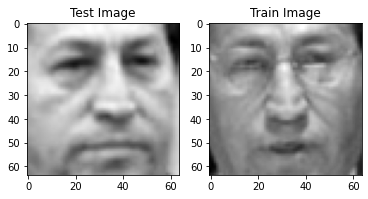

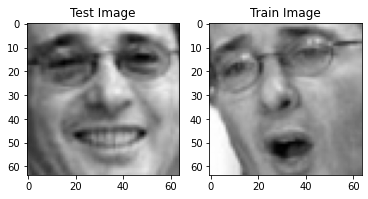

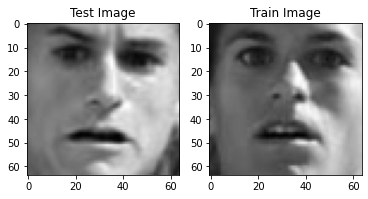

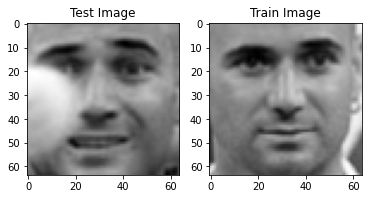

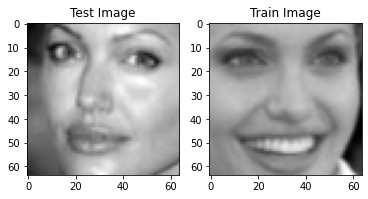

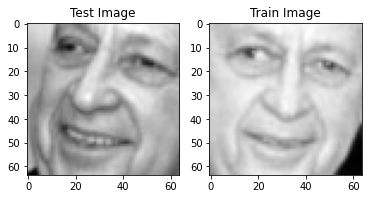

In [83]:
count = 0
for key, value in trainImg.items():
    fig ,axs = plt.subplots(1,2,figsize=(6,3))
    axs[0].set_title("Test Image")
    axs[0].imshow(testImg[key][0],cmap='gray')
    axs[1].set_title("Train Image")
    axs[1].imshow(value[0],cmap = 'gray')
    plt.show()
    count=1+count
    if(count>5):
        break    
    

[[72, 6], [6, 56], [5, 34], [3, 4], [3, 5], [1, 2]]


In [84]:
#Covariance Matrix
Cov = np.matmul(A.T,A)

In [85]:
print(Cov.shape)

(1178, 1178)


In [86]:
#Calculating Eigen Vector and Value
w , v = np.linalg.eig(Cov)

In [87]:
#Sorting eVal_eganVec
eVal_eganVec = list()
for i in range(len(trainImg)*5):
    eVal_eganVec.append([w[i] , v[:,i]])
sortedeeV =sorted(eVal_eganVec, key=lambda x: x[0],reverse=True)

In [88]:
#Converting eigenvector from m x1  to n^2 x 1
eigenVector = list()
for i in sortedeeV:
    eigenVector.append(np.matmul(A,i[1]))

In [89]:
print(eigenVector[0].shape)
print(len(eigenVector))

(4096,)
310


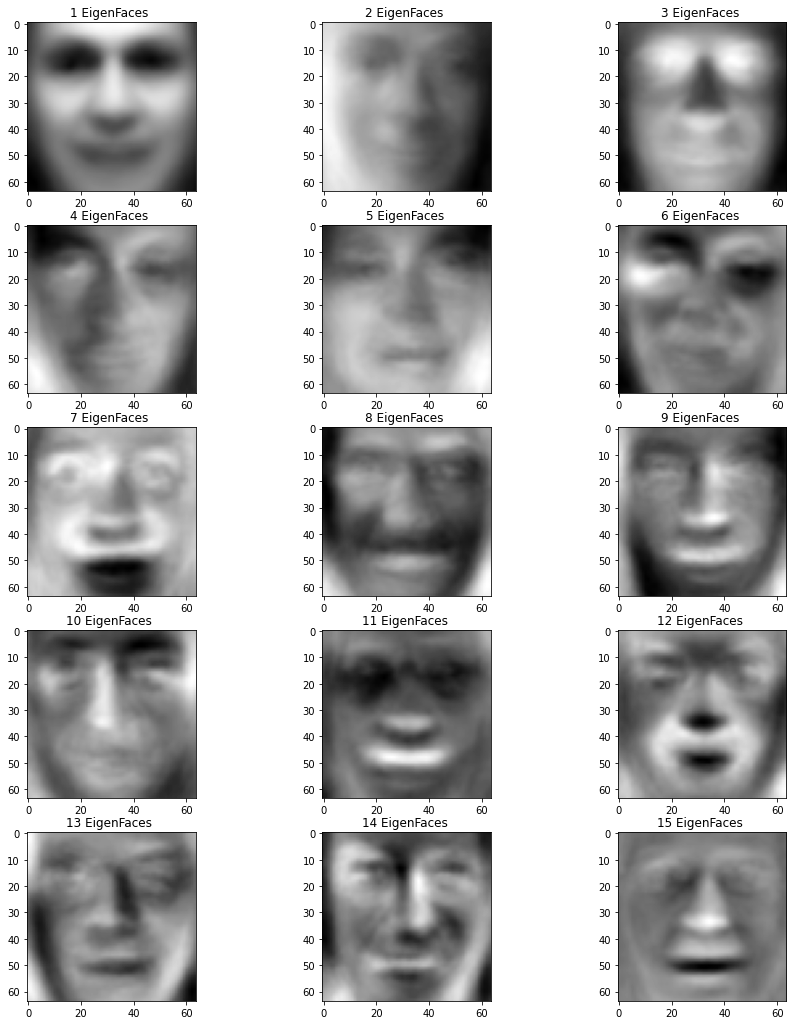

In [90]:
fig ,axs = plt.subplots(5,3,figsize=(15,18))
for i in range(5):
    for j in range(3):
        axs[i,j].set_title(str(3*i+j+1) + " EigenFaces ")
        axs[i,j].imshow(eigenVector[3*i+j].reshape(64,64),cmap = 'gray')

In [91]:
def eigenRepresentation(img,eigenVector,dim = 50):
    imgReresentation = np.zeros((dim))
    for i in range(dim):
        imgReresentation[i] = np.dot(img,eigenVector[i])
    return imgReresentation/(imgsize)

# No of eigenFaces used to make face-space
sz=len(eigenVector)

# Faces From which we learned eigenVectors
knowFaces = {}
for key, value in trainImg.items():
    knowFaces[key] = list()
    for face in value:
        meanc = face.flatten()
        meanc = meanc - np.mean(meanc)
        knowFaces[key].append(eigenRepresentation(meanc,eigenVector,sz))

unknowFaces = {}
for key, value in testImg.items():
    unknowFaces[key] = list()
    for face in value:
        meanc = face.flatten()
        meanc = meanc - np.mean(meanc)
        unknowFaces[key].append(eigenRepresentation(meanc,eigenVector,sz))

In [92]:
# Testing Phase
correct = 0
incorrect =0
total=0
for key,value in unknowFaces.items():
    for puface in value:#pface = Projected unkown Face
        total+=1
        minDist = 1000
        ans = 'None'
        for tkey, tvalue in knowFaces.items():
            for pkface in tvalue:
                dist = np.linalg.norm(puface - pkface )#Euclidean distance
                #print(dist)
                if( dist > minDist):
                    minDist = dist
                    ans = tkey
        if(ans == key):
            correct=correct+1
        else:
            incorrect=incorrect+1
            
print("Correct : ",correct)
print("Incorrect : ",incorrect)
print("Total : ",correct+incorrect)
     

Correct :  0
Incorrect :  1845
Total :  1845


In [93]:
print("Total : ",total)

Total :  1845
